In [1]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

# Read in the data

df = pd.read_csv(r'C:\Users\User\Downloads\archive\movies.csv')

In [3]:
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country      budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000.0   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000.0   
2              Leigh Brackett       Mark Hamill   United States  18000000.0   
3                Jim Abrahams       Robert Hays   United States   3500000.0   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000.0   
...                       ...               ...             ...         ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000.0   
7664              Lisa Huston  Michael Saquella   United States         NaN   
7665             Lynno Lovert      Onyama Laura   United States     58750.0   
7666            James Randall     Christina Roz   United States     15000.0   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         NaN   

            gross                    company  runtime  
0      46998772.0               Warner Bros.    146.0  
1      58853106.0          Columbia Pictures    104.0  
2     538375067.0                  Lucasfilm    124.0  
3      83453539.0         Paramount Pictures     88.0  
4      39846344.0             Orion Pictures     98.0  
...           ...                        ...      ...  
7663          NaN                        NaN     90.0  
7664          NaN  Cactus Blue Entertainment     90.0  
7665          NaN           Embi Productions      NaN  
7666          NaN                        NaN    120.0  
7667          NaN                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [6]:
released_split = df['released'].str.split('(')

In [7]:
released_split

0          [June 13, 1980 , United States)]
1           [July 2, 1980 , United States)]
2          [June 20, 1980 , United States)]
3           [July 2, 1980 , United States)]
4          [July 25, 1980 , United States)]
                       ...                 
7663    [October 23, 2020 , United States)]
7664    [February 7, 2020 , United States)]
7665           [April 27, 2020 , Cameroon)]
7666     [October 1, 2020 , United States)]
7667     [August 19, 2020 , United States)]
Name: released, Length: 7668, dtype: object

In [9]:
release_date = released_split.str.get(0)
country_correct = released_split.str.get(1)

In [10]:
release_date

0          June 13, 1980 
1           July 2, 1980 
2          June 20, 1980 
3           July 2, 1980 
4          July 25, 1980 
              ...        
7663    October 23, 2020 
7664    February 7, 2020 
7665      April 27, 2020 
7666     October 1, 2020 
7667     August 19, 2020 
Name: released, Length: 7668, dtype: object

In [12]:
country_correct = country_correct.str.strip(')')

In [13]:
country_correct

0       United States
1       United States
2       United States
3       United States
4       United States
            ...      
7663    United States
7664    United States
7665         Cameroon
7666    United States
7667    United States
Name: released, Length: 7668, dtype: object

In [14]:
df['country'] = country_correct
df['released'] = release_date

In [15]:
# Check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0002608242044861763%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [17]:
country_correct.isnull().sum()

2

In [18]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [19]:
# Missing values

df['rating'] = df['rating'].fillna('Missing')
df['writer'] = df['writer'].fillna('Missing')
df['star'] = df['star'].fillna('Missing')
df['country'] = df['country'].fillna('Missing')
df['company'] = df['company'].fillna('Missing')
df['budget'] = df['budget'].fillna(0)
df['votes'] = df['votes'].fillna(0)
df['released'] = df['released'].fillna(method = 'pad')
df['runtime'] = df['runtime'].fillna(df['runtime'].mean())
df['gross'] = df['gross'].fillna(0)
df['score'] = df['score'].fillna(df['score'].mean())

In [20]:
#Changing column data types

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [21]:
df

name   rating      genre  \
0                                        The Shining        R      Drama   
1                                    The Blue Lagoon        R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back       PG     Action   
3                                          Airplane!       PG     Comedy   
4                                         Caddyshack        R     Comedy   
...                                              ...      ...        ...   
7663                                    More to Life  Missing      Drama   
7664                                     Dream Round  Missing     Comedy   
7665                                   Saving Mbango  Missing      Drama   
7666                                    It's Just Us  Missing      Drama   
7667                                       Tee em el  Missing     Horror   

      year           released     score      votes         director  \
0     1980     June 13, 1980   8.400000   927000.0  Stanley Kubrick   
1     1980      July 2, 1980   5.800000    65000.0   Randal Kleiser   
2     1980     June 20, 1980   8.700000  1200000.0   Irvin Kershner   
3     1980      July 2, 1980   7.700000   221000.0     Jim Abrahams   
4     1980     July 25, 1980   7.300000   108000.0     Harold Ramis   
...    ...                ...       ...        ...              ...   
7663  2020  October 23, 2020   3.100000       18.0    Joseph Ebanks   
7664  2020  February 7, 2020   4.700000       36.0     Dusty Dukatz   
7665  2020    April 27, 2020   5.700000       29.0     Nkanya Nkwai   
7666  2020   October 1, 2020   6.390411        0.0    James Randall   
7667  2020   August 19, 2020   5.700000        7.0     Pereko Mosia   

                       writer              star        country    budget  \
0                Stephen King    Jack Nicholson  United States  19000000   
1     Henry De Vere Stacpoole    Brooke Shields  United States   4500000   
2              Leigh Brackett       Mark Hamill  United States  18000000   
3                Jim Abrahams       Robert Hays  United States   3500000   
4          Brian Doyle-Murray       Chevy Chase  United States   6000000   
...                       ...               ...            ...       ...   
7663            Joseph Ebanks      Shannon Bond  United States      7000   
7664              Lisa Huston  Michael Saquella  United States         0   
7665             Lynno Lovert      Onyama Laura       Cameroon     58750   
7666            James Randall     Christina Roz  United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso  United States         0   

          gross                    company     runtime  
0      46998772               Warner Bros.  146.000000  
1      58853106          Columbia Pictures  104.000000  
2     538375067                  Lucasfilm  124.000000  
3      83453539         Paramount Pictures   88.000000  
4      39846344             Orion Pictures   98.000000  
...         ...                        ...         ...  
7663          0                    Missing   90.000000  
7664          0  Cactus Blue Entertainment   90.000000  
7665          0           Embi Productions  107.261613  
7666          0                    Missing  120.000000  
7667          0                PK 65 Films  102.000000  

[7668 rows x 15 columns]

In [27]:
year_correct = df['released'].str[-5:]

In [28]:
year_correct

0       1980 
1       1980 
2       1980 
3       1980 
4       1980 
        ...  
7663    2020 
7664    2020 
7665    2020 
7666    2020 
7667    2020 
Name: released, Length: 7668, dtype: object

In [29]:
#Create correct year column

df['yearcorrect'] = year_correct

In [30]:
df

name   rating      genre  \
0                                        The Shining        R      Drama   
1                                    The Blue Lagoon        R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back       PG     Action   
3                                          Airplane!       PG     Comedy   
4                                         Caddyshack        R     Comedy   
...                                              ...      ...        ...   
7663                                    More to Life  Missing      Drama   
7664                                     Dream Round  Missing     Comedy   
7665                                   Saving Mbango  Missing      Drama   
7666                                    It's Just Us  Missing      Drama   
7667                                       Tee em el  Missing     Horror   

      year           released     score      votes         director  \
0     1980     June 13, 1980   8.400000   927000.0  Stanley Kubrick   
1     1980      July 2, 1980   5.800000    65000.0   Randal Kleiser   
2     1980     June 20, 1980   8.700000  1200000.0   Irvin Kershner   
3     1980      July 2, 1980   7.700000   221000.0     Jim Abrahams   
4     1980     July 25, 1980   7.300000   108000.0     Harold Ramis   
...    ...                ...       ...        ...              ...   
7663  2020  October 23, 2020   3.100000       18.0    Joseph Ebanks   
7664  2020  February 7, 2020   4.700000       36.0     Dusty Dukatz   
7665  2020    April 27, 2020   5.700000       29.0     Nkanya Nkwai   
7666  2020   October 1, 2020   6.390411        0.0    James Randall   
7667  2020   August 19, 2020   5.700000        7.0     Pereko Mosia   

                       writer              star        country    budget  \
0                Stephen King    Jack Nicholson  United States  19000000   
1     Henry De Vere Stacpoole    Brooke Shields  United States   4500000   
2              Leigh Brackett       Mark Hamill  United States  18000000   
3                Jim Abrahams       Robert Hays  United States   3500000   
4          Brian Doyle-Murray       Chevy Chase  United States   6000000   
...                       ...               ...            ...       ...   
7663            Joseph Ebanks      Shannon Bond  United States      7000   
7664              Lisa Huston  Michael Saquella  United States         0   
7665             Lynno Lovert      Onyama Laura       Cameroon     58750   
7666            James Randall     Christina Roz  United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso  United States         0   

          gross                    company     runtime yearcorrect  
0      46998772               Warner Bros.  146.000000       1980   
1      58853106          Columbia Pictures  104.000000       1980   
2     538375067                  Lucasfilm  124.000000       1980   
3      83453539         Paramount Pictures   88.000000       1980   
4      39846344             Orion Pictures   98.000000       1980   
...         ...                        ...         ...         ...  
7663          0                    Missing   90.000000       2020   
7664          0  Cactus Blue Entertainment   90.000000       2020   
7665          0           Embi Productions  107.261613       2020   
7666          0                    Missing  120.000000       2020   
7667          0                PK 65 Films  102.000000       2020   

[7668 rows x 16 columns]

In [51]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

name  rating  genre  year  released     score      votes  director  \
5445   533       6      0  2009       610  7.800000  1100000.0      1155   
7445   535       6      0  2019       153  8.400000   903000.0       162   
3045  6896       6      6  1997       616  7.800000  1100000.0      1155   
6663  5144       6      0  2015       612  7.800000   876000.0      1125   
7244   536       6      0  2018       161  8.400000   897000.0       162   
7480  6194       5      2  2019      1307  6.900000   222000.0      1455   
6653  2969       6      0  2015      1509  7.000000   593000.0       517   
6043  5502       6      0  2012      2170  8.000000  1300000.0      1517   
6646  2145       6      0  2015       188  7.100000   370000.0      1189   
7494  2131       5      2  2019      2343  6.800000   148000.0       432   
6644   534       6      0  2015      1967  7.300000   777000.0      1517   
7247   791       6      0  2018       844  7.300000   661000.0      2457   
5845  2407       6      1  2011      1271  8.100000   790000.0       679   
7075  5145       6      0  2017       580  7.000000   581000.0      2282   
7271  2970       6      0  2018      1591  6.200000   277000.0      1121   
6262  2130       5      2  2013      2378  7.400000   585000.0       432   
7072   657       5      7  2017      1787  7.100000   283000.0       250   
7281  2760       5      2  2018      1531  7.600000   263000.0       303   
7055  5833       6      0  2017        49  6.600000   214000.0       835   
6244  2823       6      0  2013      2151  7.100000   779000.0      2543   
6688  3622       5      2  2015      1229  6.400000   218000.0      1639   
6846  1056       6      0  2016      2185  7.800000   694000.0       162   
7250   474       6      0  2018       652  6.900000   404000.0      1189   
4245  6221       6      0  2003       597  8.900000  1700000.0      2193   
7458  5084       6      0  2019      1320  7.500000   359000.0      1463   
7456  1061       6      0  2019      1949  6.800000   478000.0       147   
5878  6968       6      0  2011      1656  6.200000   390000.0      1886   
6059  4951       6      0  2012      2451  7.700000   642000.0      2476   
6494  6967       6      0  2014      1638  5.600000   302000.0      1886   
2448  6194       1      2  1994      1603  8.500000   970000.0      2415   
6047  5726       6      0  2012      1328  8.400000  1600000.0       483   
7463  5141       6      0  2019       638  6.500000   394000.0      1125   
7450  2930       7      5  2019      2664  8.400000  1000000.0      2767   
7488  6949       1      2  2019      1581  7.700000   217000.0      1509   
5685  6948       1      2  2010      1551  8.200000   776000.0      1678   
4852  4258       6      0  2006      1455  7.300000   668000.0       996   
6869  4616       6      0  2016       591  7.800000   572000.0       912   
7481   290       5      1  2019      2106  6.900000   239000.0      1031   
5860  4261       6      0  2011      2065  6.600000   492000.0      2341   
7140  1552       5      2  2017      1678  6.300000   119000.0      1639   
2245  2967       6      0  1993      1496  8.100000   894000.0      2660   
6908  1978       5      2  2016      1544  7.300000   250000.0       124   
3451  5138       5      0  1999      2039  6.500000   748000.0       963   
5667   300       5      1  2010      1923  6.400000   392000.0      2745   
6863  7504       5      2  2016      1917  8.000000   450000.0       362   
6045  6001       6      1  2012       571  7.800000   773000.0      2193   
3843  2412       5      1  2001      2273  7.600000   685000.0       435   
5243  5725       6      0  2008      1297  9.000000  2400000.0       483   
5652  2406       6      1  2010      2295  7.700000   495000.0       679   
6311  1551       5      2  2013      1412  7.300000   377000.0      2237   
6905  6108       5      1  2016        58  7.400000   264000.0      1455   
7051  2956       6      0  2017       636  6.900000   

In [33]:
pd.set_option('display.max_rows', None)

In [36]:
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [37]:
#Hypothesis: 
#1. Budget has a high correlation to gross revenue
#2. Company has a high correlation to gross revenue

<function matplotlib.pyplot.show(close=None, block=None)>

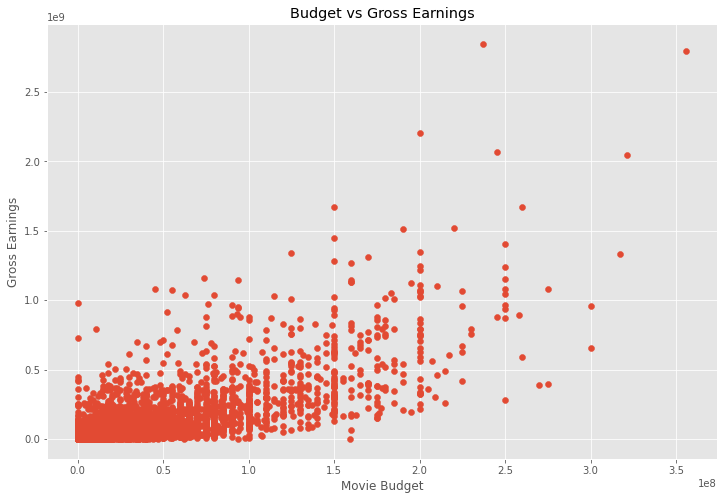

In [39]:
#Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Movie Budget')

plt.ylabel('Gross Earnings')

plt.show

<AxesSubplot:xlabel='budget', ylabel='gross'>

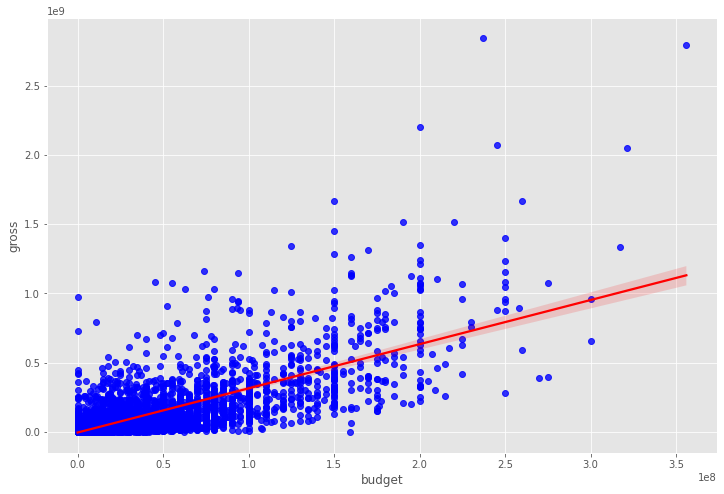

In [41]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"blue"}, line_kws={"color":"red"})

In [42]:
#Correlation

df.corr(method='pearson')

year     score     votes    budget     gross   runtime
year     1.000000  0.097936  0.222427  0.309212  0.261900  0.120766
score    0.097936  1.000000  0.409159  0.055661  0.186384  0.399329
votes    0.222427  0.409159  1.000000  0.486931  0.632870  0.309114
budget   0.309212  0.055661  0.486931  1.000000  0.750157  0.269485
gross    0.261900  0.186384  0.632870  0.750157  1.000000  0.245223
runtime  0.120766  0.399329  0.309114  0.269485  0.245223  1.000000

In [43]:
#High correlation between budget and gross is wrong

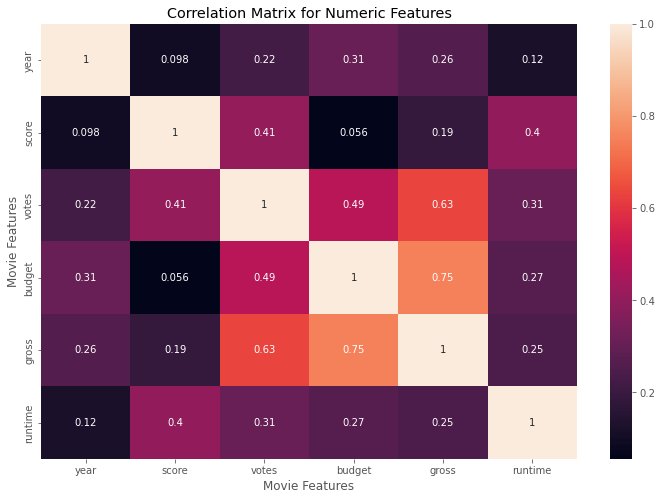

In [45]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [62]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] =df_numerized[col_name].astype('category')
        df_numerized[col_name] =df_numerized[col_name].cat.codes

df_numerized.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  6587       7      6  1980      1510    8.4   927000.0      2589    4015   
1  5573       7      1  1980      1311    5.8    65000.0      2269    1632   
2  5142       5      0  1980      1568    8.7  1200000.0      1111    2567   
3   286       5      4  1980      1311    7.7   221000.0      1301    2000   
4  1027       7      4  1980      1360    7.3   108000.0      1054     521   

   star  country    budget      gross  company  runtime  yearcorrect  
0  1047       57  19000000   46998772     2320    146.0            0  
1   327       57   4500000   58853106      731    104.0            0  
2  1745       57  18000000  538375067     1540    124.0            0  
3  2247       57   3500000   83453539     1813     88.0            0  
4   410       57   6000000   39846344     1778     98.0            0

In [61]:
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  6587       7      6  1980      1510    8.4   927000.0      2589    4015   
1  5573       7      1  1980      1311    5.8    65000.0      2269    1632   
2  5142       5      0  1980      1568    8.7  1200000.0      1111    2567   
3   286       5      4  1980      1311    7.7   221000.0      1301    2000   
4  1027       7      4  1980      1360    7.3   108000.0      1054     521   

   star  country    budget      gross  company  runtime  yearcorrect  
0  1047       57  19000000   46998772     2320    146.0            0  
1   327       57   4500000   58853106      731    104.0            0  
2  1745       57  18000000  538375067     1540    124.0            0  
3  2247       57   3500000   83453539     1813     88.0            0  
4   410       57   6000000   39846344     1778     98.0            0

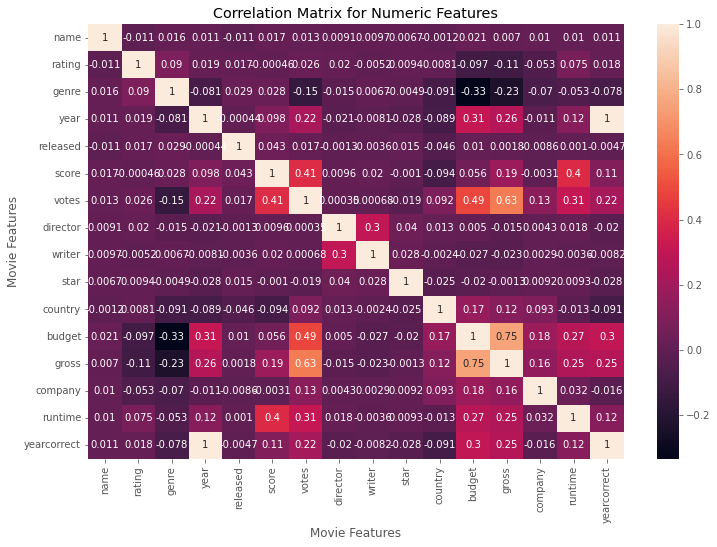

In [52]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [53]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name         1.000000 -0.010640  0.016355  0.011453 -0.010669  0.017095   
rating      -0.010640  1.000000  0.090041  0.018928  0.016605 -0.000457   
genre        0.016355  0.090041  1.000000 -0.081261  0.029403  0.027959   
year         0.011453  0.018928 -0.081261  1.000000 -0.000444  0.097936   
released    -0.010669  0.016605  0.029403 -0.000444  1.000000  0.042627   
score        0.017095 -0.000457  0.027959  0.097936  0.042627  1.000000   
votes        0.013038  0.026496 -0.145296  0.222427  0.016934  0.409159   
director     0.009079  0.020088 -0.015258 -0.020795 -0.001344  0.009559   
writer       0.009727 -0.005222  0.006700 -0.008146 -0.003611  0.019685   
star         0.006738  0.009385 -0.004879 -0.027724  0.014956 -0.000996   
country     -0.001198  0.008145 -0.091219 -0.088627 -0.046120 -0.093694   
budget       0.020548 -0.097327 -0.334021  0.309212  0.010346  0.055661   
gross        0.006989 -0.107710 -0.234297  0.261900  0.001799  0.186384   
company      0.010075 -0.053455 -0.070461 -0.011180 -0.008574 -0.003070   
runtime      0.010390  0.074953 -0.052699  0.120766  0.000997  0.399329   
yearcorrect  0.010900  0.017558 -0.077751  0.997416 -0.004719  0.105759   

                votes  director    writer      star   country    budget  \
name         0.013038  0.009079  0.009727  0.006738 -0.001198  0.020548   
rating       0.026496  0.020088 -0.005222  0.009385  0.008145 -0.097327   
genre       -0.145296 -0.015258  0.006700 -0.004879 -0.091219 -0.334021   
year         0.222427 -0.020795 -0.008146 -0.027724 -0.088627  0.309212   
released     0.016934 -0.001344 -0.003611  0.014956 -0.046120  0.010346   
score        0.409159  0.009559  0.019685 -0.000996 -0.093694  0.055661   
votes        1.000000  0.000349  0.000675 -0.019314  0.092184  0.486931   
director     0.000349  1.000000  0.299517  0.039692  0.013313  0.004976   
writer       0.000675  0.299517  1.000000  0.028417 -0.002433 -0.026538   
star        -0.019314  0.039692  0.028417  1.000000 -0.024859 -0.020152   
country      0.092184  0.013313 -0.002433 -0.024859  1.000000  0.166715   
budget       0.486931  0.004976 -0.026538 -0.020152  0.166715  1.000000   
gross        0.632870 -0.014916 -0.022987 -0.001269  0.119184  0.750157   
company      0.131622  0.004298  0.002853  0.009188  0.093293  0.183916   
runtime      0.309114  0.017624 -0.003637  0.009311 -0.012948  0.269485   
yearcorrect  0.217915 -0.020432 -0.008183 -0.028083 -0.091451  0.299876   

                gross   company   runtime  yearcorrect  
name         0.006989  0.010075  0.010390     0.010900  
rating      -0.107710 -0.053455  0.074953     0.017558  
genre       -0.234297 -0.070461 -0.052699    -0.077751  
year         0.261900 -0.011180  0.120766     0.997416  
released     0.001799 -0.008574  0.000997    -0.004719  
score        0.186384 -0.003070  0.399329     0.105759  
votes        0.632870  0.131622  0.309114     0.217915  
director    -0.014916  0.004298  0.017624    -0.020432  
writer      -0.022987  0.002853 -0.003637    -0.008183  
star        -0.001269  0.009188  0.009311    -0.028083  
country      0.119184  0.093293 -0.012948    -0.091451  
budget       0.750157  0.183916  0.269485     0.299876  
gross        1.000000  0.155081  0.245223     0.254893  
company      0.155081  1.000000  0.032026    -0.016419  
runtime      0.245223  0.032026  1.000000     0.120593  
yearcorrect  0.254893 -0.016419  0.120593     1.000000

In [57]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs.head()

name  name        1.000000
      rating     -0.010640
      genre       0.016355
      year        0.011453
      released   -0.010669
dtype: float64

In [60]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs.head()

budget  genre    -0.334021
genre   budget   -0.334021
        gross    -0.234297
gross   genre    -0.234297
votes   genre    -0.145296
dtype: float64

In [56]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr.

votes        gross          0.632870
gross        votes          0.632870
             budget         0.750157
budget       gross          0.750157
yearcorrect  year           0.997416
year         yearcorrect    0.997416
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64